<a href="https://colab.research.google.com/github/alewizanov/Simple-EDA-by-me/blob/main/%5BExploratory_Data_Analysis%5D_Jumlah_Produksi_Tanaman_Tahunan_Perkebunan_Rakyat_Jabar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Library Yang Dibutuhkan**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import numpy as np

## **Load Dataset**<p>Referensi Data: https://opendata.jabarprov.go.id/id/dataset/jumlah-produksi-tanaman-tahunan-perkebunan-rakyat-berdasarkan-komoditi-di-jawa-barat (2013 s/d 2019)

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving od_jml_prdks_tnmn_thnan_perkebunan_rakyat__komoditi.csv to od_jml_prdks_tnmn_thnan_perkebunan_rakyat__komoditi.csv


**Preview 5 Data Awal dan 5 Data Akhir**

In [ ]:
df = pd.read_csv(io.BytesIO(data_to_load['od_jml_prdks_tnmn_thnan_perkebunan_rakyat__komoditi.csv']))
df.head(5)

,id,jenis_komoditi,jumlah,satuan,tahun
0,1,AREN,12477,TON,2013
1,2,CENGKEH,6422,TON,2013
2,3,GUTTAPERCHA,0,TON,2013
3,4,JAMBU METE,37,TON,2013
4,5,JARAK,261,TON,2013


In [ ]:
df.tail(5)

,id,jenis_komoditi,jumlah,satuan,tahun
200,201,SEREHWANGI,6359609467,TON,2019
201,202,T E H,415548015,TON,2019
202,203,TEBU,252701,TON,2019
203,204,TEBU (GULA CAKO),503,TON,2019
204,205,TEMBAKAU,836873225,TON,2019


## **Explore The Data**

**Cek Struktur Kolom dan Baris Data**

In [ ]:
df.shape

(205, 5)

**Cek Data NaN**

In [ ]:
df_nan = df[df.isna().any(axis=1)]
display(df_nan.head())

,id,jenis_komoditi,jumlah,satuan,tahun


**Cek Tipe Data**

In [ ]:
df.dtypes

id                 int64
jenis_komoditi    object
jumlah             int64
satuan            object
tahun              int64
dtype: object

**Informasi mengenai nilai rataan, standar deviasi dan IQR (interquartile range) pada kolom "jumlah"**

In [ ]:
print(df['jumlah'].describe())

count    2.050000e+02
mean     6.706397e+08
std      2.094531e+09
min      0.000000e+00
25%      1.920000e+02
50%      1.299000e+03
75%      8.391300e+04
max      9.316246e+09
Name: jumlah, dtype: float64


**Analisa korelasi antar kolom**

In [ ]:
correlations = df.corr(method='kendall')
correlations

,id,jumlah,tahun
id,1.000000,0.353775,0.926831
jumlah,0.353775,1.000000,0.373282
tahun,0.926831,0.373282,1.000000


<function matplotlib.pyplot.show>

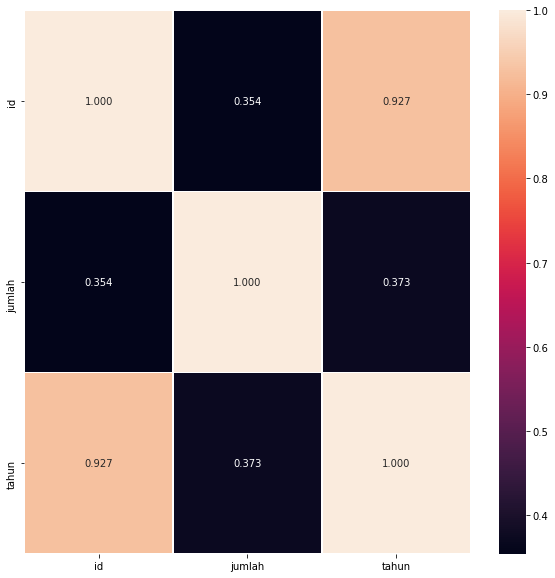

In [ ]:
#Rerefensi https://medium.com/labtek-indie/exploratory-data-analysis-7b9b0234ba05
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlations, annot=True, linewidths=.5, fmt='.3f', ax=ax)
plt.show

## **Data Insights**


In [ ]:
groupby_komoditi = df.groupby("jenis_komoditi")

**Jumlah Produksi Tanaman Keseluruhan Tahun**

In [ ]:
#penjumlahan seluruh produksi tanaman berdasarkan komoditi (ton)
groupby_komoditi[["jenis_komoditi", "jumlah"]].sum()

,jumlah
jenis_komoditi,
AKARWANGI,48460
AREN,12328549450
CENGKEH,1555293602
GUTTAPERCHA,0
JAMBU METE,25701
JARAK,34905
KAKAO,16637293357
KAPOK,2963900461
KARET,15288749908


**Visualisasi Data Jumlah Komoditi berdasarkan Jenisnya (2013 s/d 2019)**